In [1]:
!pip install pandas matplotlib statsmodels


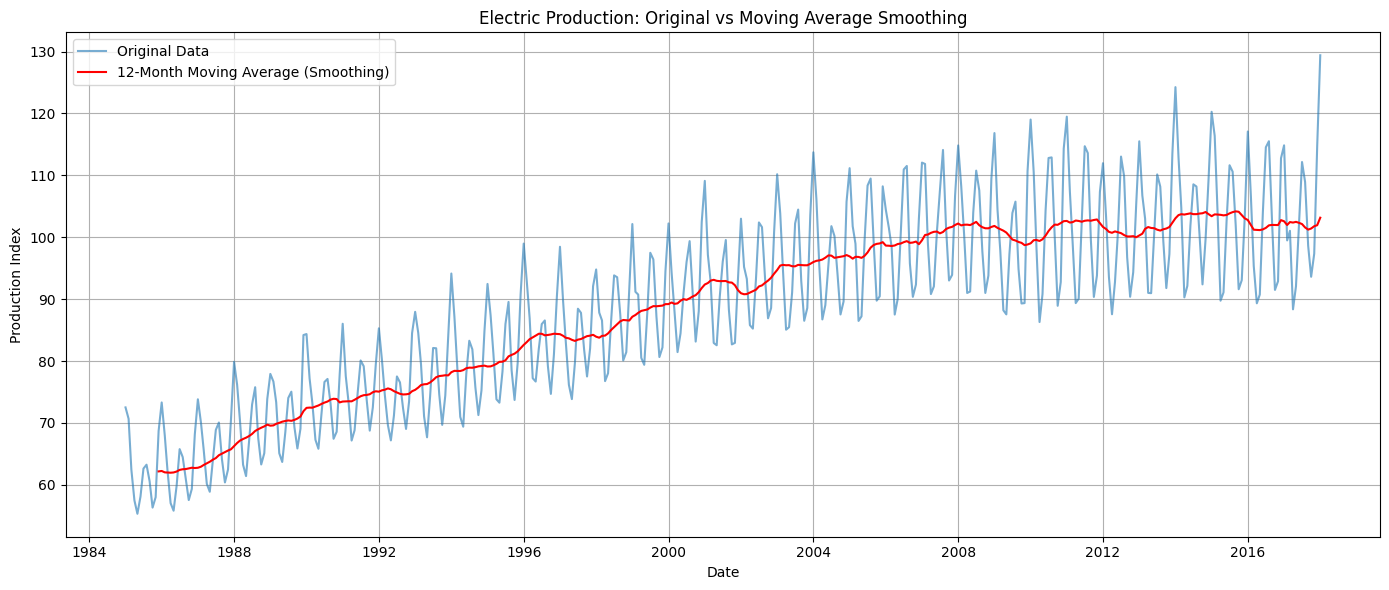

ADF Statistic: -2.256990350047235
p-value: 0.1862146911658712


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


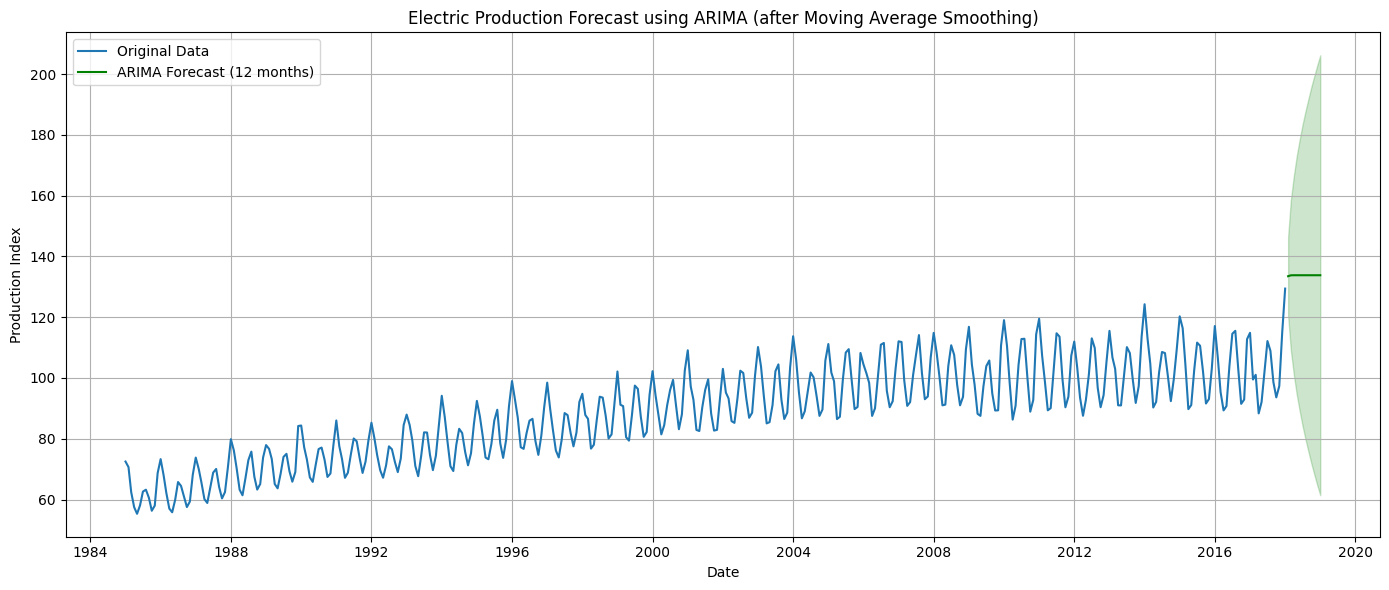

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas.tseries.offsets import DateOffset

# Load the dataset
df = pd.read_csv("Electric_Production.csv")

# Step 1: Preprocessing
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

# Step 2: Moving Average Smoothing
df['Smoothed'] = df['IPG2211A2N'].rolling(window=12).mean()

# Plot 1: Original Data vs Smoothed Data
plt.figure(figsize=(14, 6))
plt.plot(df['IPG2211A2N'], label='Original Data', alpha=0.6)
plt.plot(df['Smoothed'], label='12-Month Moving Average (Smoothing)', color='red')
plt.title('Electric Production: Original vs Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Production Index')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Check for stationarity (ADF Test)
adf_result = adfuller(df['IPG2211A2N'].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# Step 4: ARIMA Time Series Forecasting (p=1, d=1, q=1)
model = ARIMA(df['IPG2211A2N'], order=(1, 1, 1))
model_fit = model.fit()

# Step 5: Forecast next 12 months
forecast_steps = 12
forecast = model_fit.get_forecast(steps=forecast_steps)

# Create forecast index for next 12 months
forecast_index = [df.index[-1] + DateOffset(months=i) for i in range(1, forecast_steps + 1)]

# Create DataFrame for forecast
forecast_df = pd.DataFrame({
    'Forecast': forecast.predicted_mean,
    'Lower CI': forecast.conf_int().iloc[:, 0],
    'Upper CI': forecast.conf_int().iloc[:, 1]
}, index=forecast_index)

# Plot 2: Forecast Results
plt.figure(figsize=(14, 6))
plt.plot(df['IPG2211A2N'], label='Original Data')
plt.plot(forecast_df['Forecast'], label='ARIMA Forecast (12 months)', color='green')
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], color='green', alpha=0.2)
plt.title('Electric Production Forecast using ARIMA (after Moving Average Smoothing)')
plt.xlabel('Date')
plt.ylabel('Production Index')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
